# Team Adult Education 

---

You are a member of the data science department at a private school. The marketing department has approached us to help write a series of blog posts that can help sell the value proposition of the school.  Secondarily, business development is very interested in developing online products in emerging markets.

**The goals are:**

- Describe the areas of highest value within the dataset.
- Describe characteristics that you believe target value.
- Identify possible markets and demographic characteristics for business development.

**Presentation requirements:**

- At least 50% of presentation must address a non-technical audience. 
- Someone who hasn't presented in class yet must take lead on presentation.

***
# Thinking in the shoes of the school

## Considerations
1. How do we identify our potential students?
2. Is there a trend amongst features of potential students?
3. How to segment the market to find the best fit of students to our programme?

## Feature selection
Chopped:
keep workclass private
drop education in preschool and grade levels

drop column weight

Segment our market based on part time course:
hours per week <=40
professional occupations

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

df = pd.read_csv("./datasets/adult.csv")


# Data Overview

In [157]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [159]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income            16281
dtype: int64

In [160]:
for col in df.columns:
    print col, "\n", df[col].value_counts()

age 
36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
39    1206
24    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
      ... 
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
workclass 
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
fnlwgt 
203488    21
120277    19
19029

# Data Cleaning
# <span style="color:blue">Chop dem features!</span>
![](https://i.kinja-img.com/gawker-media/image/upload/s--JsADUkpb--/c_scale,fl_progressive,q_80,w_800/rndzmwxwxjkwyjxo2npg.jpg?raw=true)

In [161]:
# dropping rows where workclass is not private, and education not in preschool, and numbers grade
df = df[df['workclass'] == 'Private']

df = df[df['education'] != 'Preschool']
df = df[~(df['education'].isin(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th']))]

In [162]:
df.drop('fnlwgt',axis=1, inplace=True)

In [163]:
for col in df.columns:
   print str(col), df[col].value_counts()

age 23    982
35    906
31    898
24    887
30    884
36    877
28    872
33    868
25    860
34    859
27    858
29    851
32    839
26    830
22    818
38    811
37    795
39    781
21    781
40    766
20    743
41    740
42    690
43    652
19    650
46    635
44    633
45    630
47    586
48    494
     ... 
62    159
63    135
64    124
65    113
66     82
67     73
68     64
69     49
70     39
71     36
72     34
73     31
90     30
74     21
76     18
17     15
75     14
80     13
77     13
81      9
79      7
78      5
84      4
85      3
83      3
88      2
82      1
89      1
86      1
87      1
Name: age, Length: 74, dtype: int64
workclass Private    29093
Name: workclass, dtype: int64
education HS-grad         11682
Some-college     7535
Bachelors        5303
Assoc-voc        1488
Masters          1376
Assoc-acdm       1085
Prof-school       361
Doctorate         263
Name: education, dtype: int64
education-num 9     11682
10     7535
13     5303
11     1488
14     1376
12 

# Part time or full time course

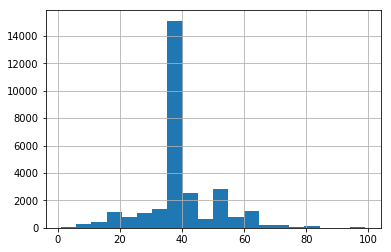

In [164]:
df['hours-per-week'].hist(bins=20)
# based on histogram, we would want to segment the market into part timers and full timers, part time being 40hours and below

In [165]:
df = df[df['hours-per-week'] <= 40]

In [166]:
df.columns

Index([u'age', u'workclass', u'education', u'education-num', u'marital-status',
       u'occupation', u'relationship', u'race', u'sex', u'capital-gain',
       u'capital-loss', u'hours-per-week', u'native-country', u'income'],
      dtype='object')

In [167]:
df.occupation.value_counts()



Adm-clerical         3400
Craft-repair         2737
Other-service        2618
Sales                2514
Prof-specialty       2051
Exec-managerial      1968
Machine-op-inspct    1685
Handlers-cleaners    1142
Tech-support          886
Transport-moving      796
Farming-fishing       240
Protective-serv       206
Priv-house-serv       112
Name: occupation, dtype: int64

In [168]:
low=['Adm-clerical','Craft-repair','Other-service','Handlers-cleaners','Tech-support','Transport-moving','Farming-fishing','Protective-serv','Priv-house-serv']

high=['Prof-specialty','Exec-managerial','Sales','Machine-op-inspct',]

In [169]:
df = df[(df['occupation'].isin(high))]

In [170]:
df=df[df['capital-gain']!=99999]

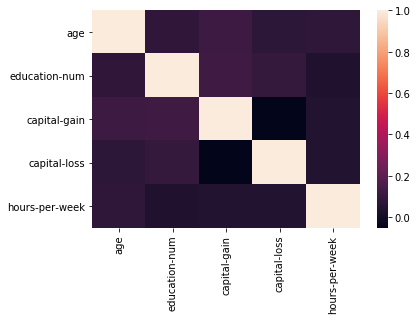

In [171]:
sns.heatmap(df.corr())

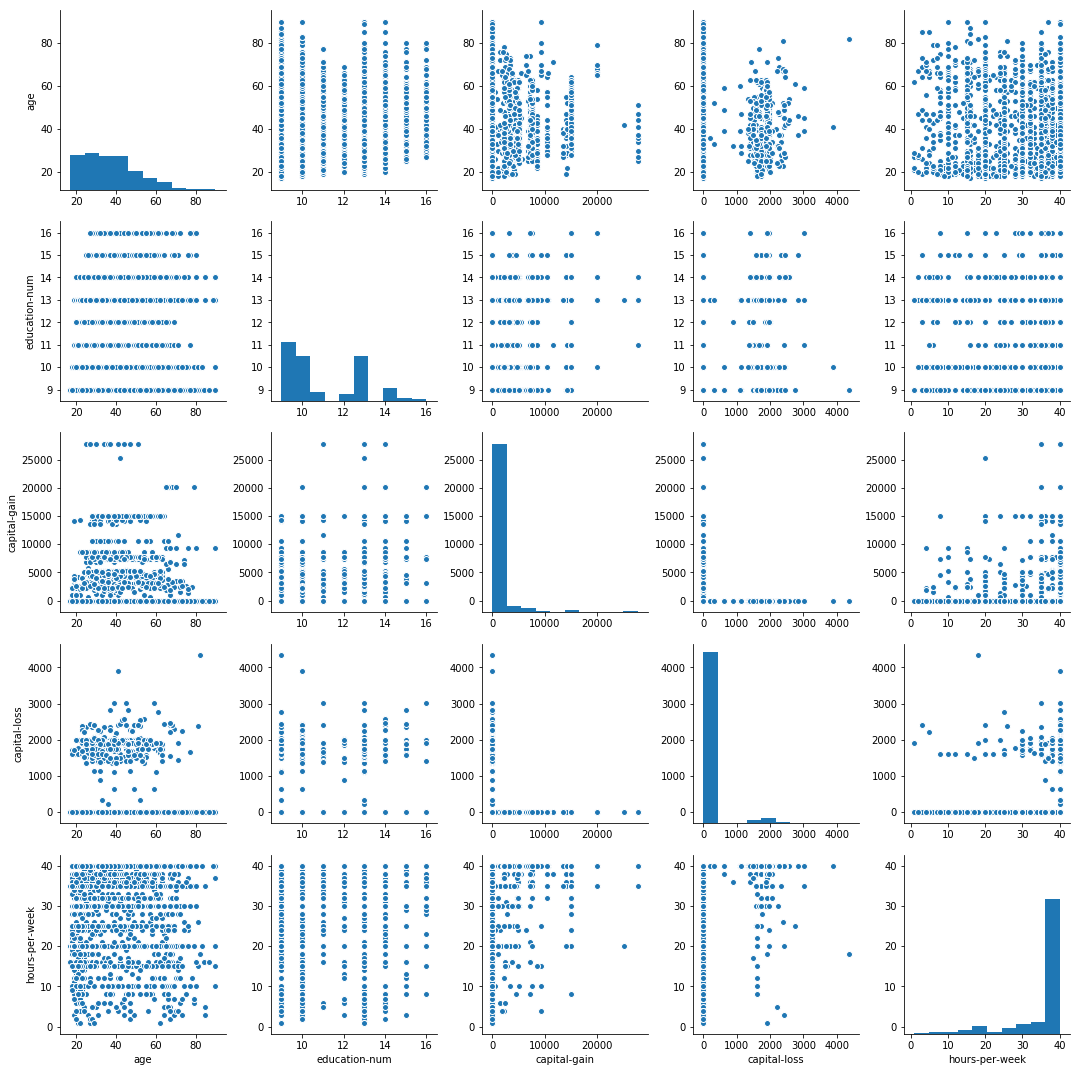

In [172]:
sns.pairplot(df, size=3)

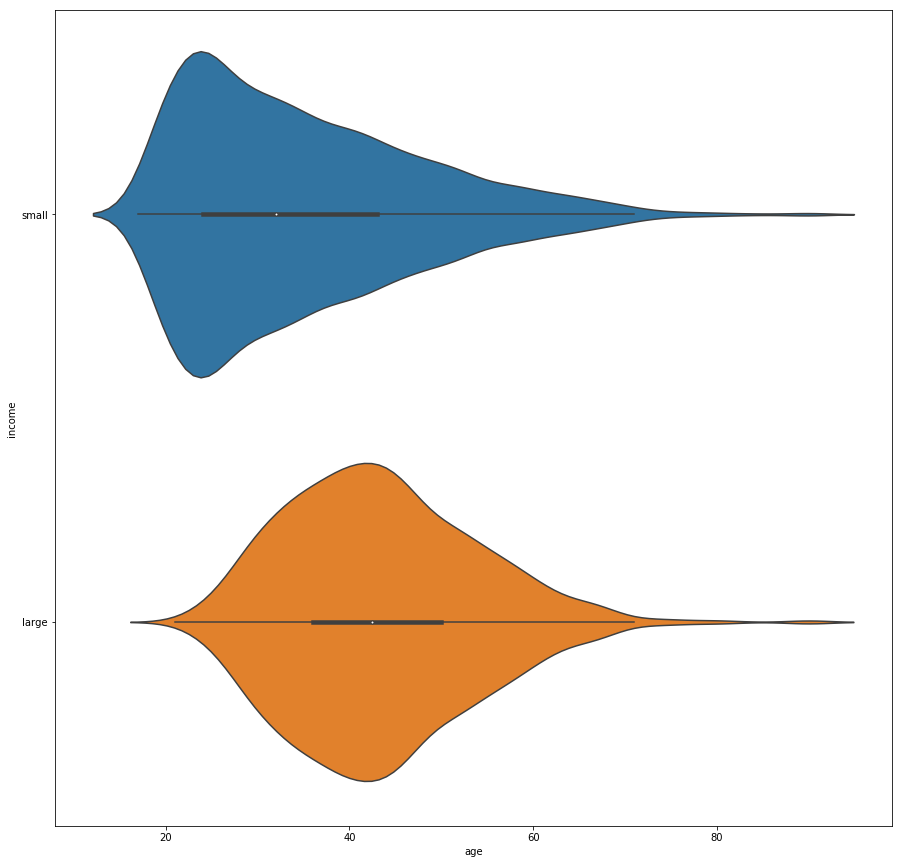

In [173]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))

ax = fig.gca()

ax = sns.violinplot(x=df['age'], y=df['income'],split=True, data=df,alpha=0.2)

In [174]:
# H0 meanage(small) = meanage(large)
small_mean = df[df['income']=='small']['age'].mean()
small_sd = df[df['income']=='small']['age'].std(ddof=1)
length=len(df[df['income']=='small']['age'])
large_mean =  df[df['income']=='large']['age'].mean()
large_sd = df[df['income']=='large']['age'].std(ddof=1)
length2=len(df[df['income']=='large']['age'])

print small_sd
print large_sd
print len(df[df['income']=='small'])

13.001077541
10.3219097982
4105


In [175]:
t_statistic = (small_mean - large_mean)/np.sqrt((small_sd**2/length)+(large_sd**2/length2))

alpha = 0.05

## Step 5: Find p-value.

## t.sf is survival function, which is 1-cdf at a given value 

## (proportion of values at least as extreme as...)

p_value = stats.t.sf(np.abs(t_statistic), len(df[df['income']=='small']) * 2 )



In [176]:
t_statistic = (small_mean - large_mean)/np.sqrt((small_sd**2/length)+(large_sd**2/length2))

alpha = 0.05

## Step 5: Find p-value.

## t.sf is survival function, which is 1-cdf at a given value 

## (proportion of values at least as extreme as...)

p_value = stats.t.sf(np.abs(t_statistic), len(df[df['income']=='small']) * 2 )





## Because our alternative hypothesis is != (rather than greater than or less than),

## we multiply our p-value by 2. (This is called a two-sided test.)

# print "Our sample median is" + str(np.median(NOX))

# print "Our sample mean is " + str(sample_mean)

print "Our t-statistic is " + str(t_statistic)

print "Our p-value is " + str(p_value)



if p_value < alpha:

    print "We reject our null hypothesis and conclude that the mean age of small income is different from the mean of large income."
elif p_value > alpha:

    print "We fail to reject our null hypothesis and cannot conclude that the mean age of small income is different from the mean age of large income ."

else:

    print "Our test is inconclusive."



Our t-statistic is -24.4860988687
Our p-value is 3.68407771744e-128
We reject our null hypothesis and conclude that the mean age of small income is different from the mean of large income.


In [177]:
df.columns

Index([u'age', u'workclass', u'education', u'education-num', u'marital-status',
       u'occupation', u'relationship', u'race', u'sex', u'capital-gain',
       u'capital-loss', u'hours-per-week', u'native-country', u'income'],
      dtype='object')

In [178]:
df.dropna(how='any')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,small
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,large
17,32,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,small
32,45,Private,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,small
36,21,Private,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,small
46,53,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States,small
47,44,Private,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,small
50,25,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Other,Female,0,0,40,United-States,small
59,30,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,small


In [179]:
df['income_binary'] = (df['income'] == 'large').astype(float).dropna(how='any')

df.dropna(how='any', inplace=True)

In [180]:
# Logistic Regression



# Importing the libraries

import numpy as np

np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt

import pandas as pd



# Importing the dataset

X = df.iloc[:, [0, 3]].values

y = df.iloc[:, -1].values



# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)



# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)



# Predicting the Test set results

y_pred = classifier.predict(X_test)



print len(y_pred)



# Making the Confusion Matrix (To evaluate the y_pred vs y_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)



print cm



1344
[[929  70]
 [253  92]]


![](http://www.dataschool.io/content/images/2015/01/confusion_matrix2.png)

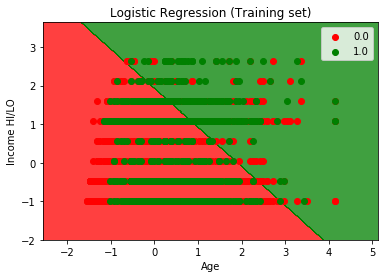

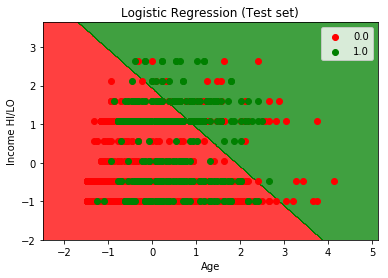

In [181]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

# X_set, y_set created to reduce the number of times to replace X_train, y_train to X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),

                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# min() -1 & max() +1 to not squeeze the colors on the axis

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),

             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# predict and plot the contour line, colour the pixelpoints, meaning the background  to red or green

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

# Plots the limits of X: Age and y: Salary

for i, j in enumerate(np.unique(y_set)):

    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],

                c = ListedColormap(('red', 'green'))(i), label = j)

# Plot the data points

plt.title('Logistic Regression (Training set)')

plt.xlabel('Age')

plt.ylabel('Income HI/LO')

plt.legend()

plt.show()



# Visualising the Test set results

from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),

                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),

             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):

    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],

                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Test set)')

plt.xlabel('Age')

plt.ylabel('Income HI/LO')

plt.legend()

plt.show()